## Projeto 13: Deep Learning - Convolutional Neural Network - Plant Desease Prediction System

- In this endeavor, we shall forge a convolutional neural network with the prowess to prognosticate the affliction of a plant, discerning the presence of any malady.
- Employing an assortment of strata and sundry hyperparameters, we shall orchestrate, cultivate, and scrutinize this discriminative model. TensorFlow and Keras shall stand as our tools of choice in this odyssey.

#### Portuguese:

- Neste projeto, criaremos uma rede neural convolucional que será capaz de prever se uma planta está sofrendo de alguma doença. 
- Usaremos diferentes camadas e outros hiperparâmetros para construir, treinar e testar este modelo de classificação. estaremos usando tensorflow e Keras para este projeto

## Algorithm start


- The requisite libraries are imported in a seamless choreography. Given our pursuit of a Convolutional Neural Network paradigm, an assembly of indispensable strata comprising layers, activations, optimizers, and the like are summoned into our script.

Portuguese:
- Processo de importação de todas as bibliotecas necessárias. Como estamos fazendo um modelo CNN, importaremos todas as camadas necessárias, ativações, otimizadores, etc.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 

Now let's take a look at some of the images in our dataset. We will plot 12 images here using the matplotlib library

Agora vamos observar algumas das imagens que estão em nosso conjunto de dados. Vamos plotar 12 imagens aqui usando a biblioteca matplotlib.

C:\Users\Sepp-Kali-Linux\AppData\Local\Temp\ipykernel_40148\3083662734.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


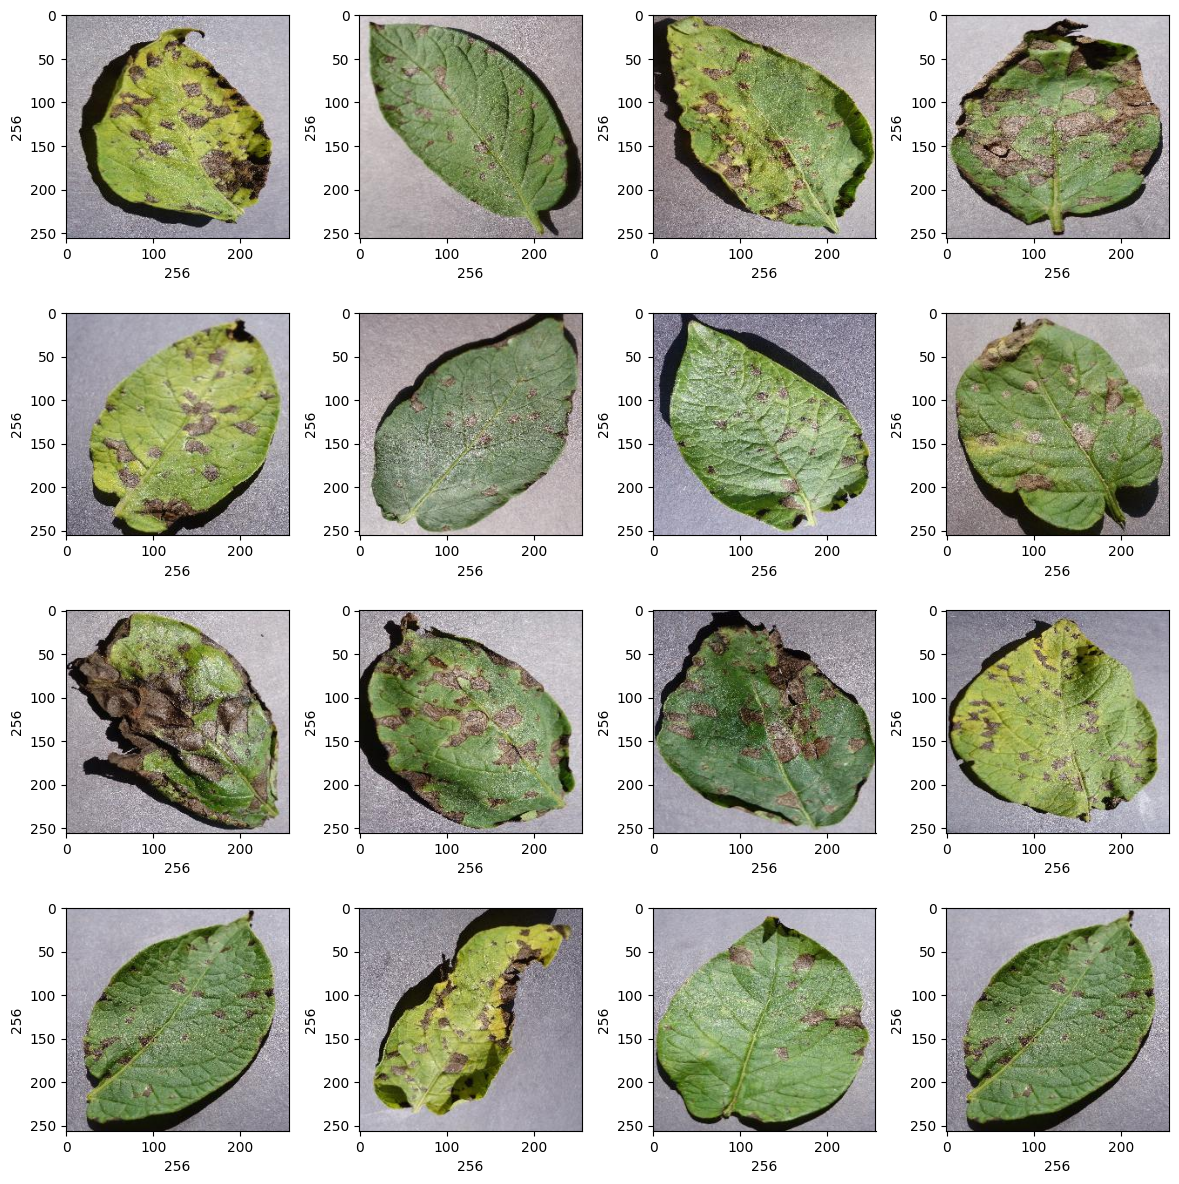

In [3]:
import os
import random
from matplotlib import pyplot as plt
from matplotlib.image import imread

# Replace the path below with the local path on your machine
path = "C:\\Users\\Sepp-Kali-Linux\\Documents\\Projetos\\Projeto 13 - Plant Disease\\Collab Code\\Data\\Plant_images_pianalytix\\Potato___Early_blight"

# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(os.path.join(path, random.choice(sorted(os.listdir(path)))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize=10)  # width of image
    plt.ylabel(rand_img.shape[0], fontsize=10)  # height of image

plt.show()


After visualizing the images, we will proceed to create a function that will convert the images into a numpy array. This is necessary as we will normalize our dataset after this step.

Depois de visualizar as imagens, vamos avançar e criar uma função que converterá as imagens em um array numpy. É necessário porque normalizaremos nosso conjunto de dados depois disso.

In [4]:
#Converting Images to array 
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

Now let's convert all the images into numpy arrays.

Agora vamos converter todas as imagens em array numpy.

In [5]:
import os
from os import listdir
from matplotlib.image import imread
import numpy as np

def convert_image_to_array(image_path):
    try:
        image = imread(image_path)
        return image
    except Exception as e:
        print(f"Error: {e}")
        return None

# Replace the path below with the local path on your machine
dir = "C:\\Users\\Sepp-Kali-Linux\\Documents\\Projetos\\Projeto 13 - Plant Disease\\Collab Code\\Data\\Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0, 1, 2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

# Convert lists to numpy arrays
image_list = np.array(image_list)
label_list = np.array(label_list)

print("Total number of images in the dataset: ", image_list.shape[0])
print("Number of images in each class: ", np.unique(label_list, return_counts=True))


Total number of images in the dataset:  900
Number of images in each class:  (array([0, 1, 2]), array([300, 300, 300], dtype=int64))


We shall also observe the image count across different classes to ascertain the dataset's balance

Também observaremos o número de imagens em diferentes classes para ver se o conjunto de dados está balanceado ou não

In [6]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
Name: count, dtype: int64

Next, we will examine the image shape

Em seguida, observaremos a forma da imagem

In [8]:
image_list[0].shape

(256, 256, 3)

Checking the total number of images, which corresponds to the length of the label list

Verificando o número total de imagens que é o comprimento da lista de labels.

In [9]:
label_list = np.array(label_list)
label_list.shape

(900,)

Following this, we will employ sklearn's train_test_split to divide the dataset into training and test data. In this case, I have chosen a test size of 0.2, resulting in an 80% training and 20% test data split

Em seguida, usaremos sklearn train_test_split para dividir o conjunto de dados em dados de teste e treinamento. Aqui, tomei o tamanho do teste como 0,2, então meus dados serão divididos em 80% de treinamento e 20% de dados de teste.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

Now, let's normalize our image dataset. Since pixel values range from 0 to 255, we will normalize the dataset by dividing each pixel value by 255

Agora vamos normalizar o conjunto de dados de nossas imagens. Como os valores de pixel variam de 0 a 255, dividiremos cada pixel da imagem por 255 para normalizar o conjunto de dados.

In [11]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Moving forward, we shall craft a network architecture for the model. We utilize various types of layers based on their characteristics, specifically Conv_2d (utilized to create a convolutional kernel that convolves with the input layer to produce the output tensor), max_pooling2d (employs downsampling by selecting the maximum value over a defined poolsize window), flatten (flattens the input and produces a 1D output), and Dense (produces output as the dot product of the input and kernel)

Em seguida, criaremos uma arquitetura de rede para o modelo. Usamos diferentes tipos de camadas de acordo com suas características, nomeadamente Conv_2d (É usado para criar um kernel convolucional que é convoluído com a camada de entrada para produzir o tensor de saída), max_pooling2d (É uma técnica de downsampling que tira o valor máximo sobre a janela definida pelo poolsize), flatten (achata a entrada e cria uma saída 1D), Dense (a camada densa produz a saída como o produto escalar da entrada e do kernel).

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

While compiling the model, we need to define the loss type as Binary Crossentropy for our model, and alongside this, specify the optimizer and metrics respectively.

Ao compilar o modelo, precisamos definir o tipo de perda que será Binary Crossentropy para o nosso modelo, juntamente com isso, também precisamos definir o otimizador e as métricas, respectivamente.

In [15]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

Subsequently, we will split the dataset into validation and training data

Em seguida, dividiremos o conjunto de dados em dados de validação e treinamento.

In [16]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

We will fit the model with the data and monitor accuracy at each epoch to gauge the model's learning progress. Now, let's train our model for 10 epochs with a batch size of 128. You can experiment with a higher number of epochs to enhance accuracy, yet here we observe that the model has already achieved a high accuracy, obviating the need for further runs. During each epoch, we can assess the model's performance by visualizing training and validation accuracy

Ajustar o modelo com os dados e descobrir a precisão em cada época para ver como nosso modelo está aprendendo. Agora vamos treinar nosso modelo em 10 épocas e um tamanho de lote de 128. Você pode tentar usar mais número de épocas para aumentar a precisão, mas aqui podemos ver que o modelo já alcançou uma precisão muito alta, então não precisamos executar isso por mais. Durante cada época, podemos ver o desempenho do modelo, visualizando a precisão do treinamento e da validação/teste

In [22]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 44s 6s/step - loss: 1.0490 - accuracy: 0.3247 - val_loss: 0.9449 - val_accuracy: 0.4653
Epoch 2/50
5/5 [==============================] - 27s 5s/step - loss: 0.9100 - accuracy: 0.5451 - val_loss: 0.8265 - val_accuracy: 0.6111
Epoch 3/50
5/5 [==============================] - 26s 5s/step - loss: 0.8137 - accuracy: 0.6111 - val_loss: 0.7512 - val_accuracy: 0.6250
Epoch 4/50
5/5 [==============================] - 27s 5s/step - loss: 0.7487 - accuracy: 0.6233 - val_loss: 0.7010 - val_accuracy: 0.6458
Epoch 5/50
5/5 [==============================] - 23s 5s/step - loss: 0.7005 - accuracy: 0.6389 - val_loss: 0.6685 - val_accuracy: 0.6597
Epoch 6/50
5/5 [==============================] - 22s 4s/step - loss: 0.6661 - accuracy: 0.6580 - val_loss: 0.6325 - val_accuracy: 0.6597
Epoch 7/50
5/5 [==============================] - 23s 4s/step - loss: 0.6345 - accuracy: 0.6528 - val_loss: 0.6003 - val_accuracy: 0.6667
Epoch 8/50
5/5 [==================

Saving the model using distinct techniques

Salvando o modelo usando diferentes técnicas

In [17]:
import os
from keras.models import load_model

# Carregando o modelo
#model = load_model("/content/drive/My Drive/plant_disease.h5")

# Substitua o caminho abaixo pelo diretório correto no seu computador
output_dir = "C:\\Users\\Sepp-Kali-Linux\\Documents\\Projetos\\Projeto 13 - Plant Disease"

# Salvar o modelo em formato h5
model.save(os.path.join(output_dir, "plant_disease.h5"))

# Serialize o modelo para JSON
json_model = model.to_json()

# Salvar a arquitetura do modelo em um arquivo JSON
with open(os.path.join(output_dir, "plant_model.json"), "w") as json_file:
    json_file.write(json_model)

# Salvar os pesos do modelo
model.save_weights(os.path.join(output_dir, "plant_model_weights.h5"))

print("Arquivos salvos com sucesso na pasta:", output_dir)


C:\Users\Sepp-Kali-Linux\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Arquivos salvos com sucesso na pasta: C:\Users\Sepp-Kali-Linux\Documents\Projetos\Projeto 13 - Plant Disease


Next, we shall plot the model's accuracy training history

Em seguida, traçaremos a precisão do modelo para o histórico de treinamento.

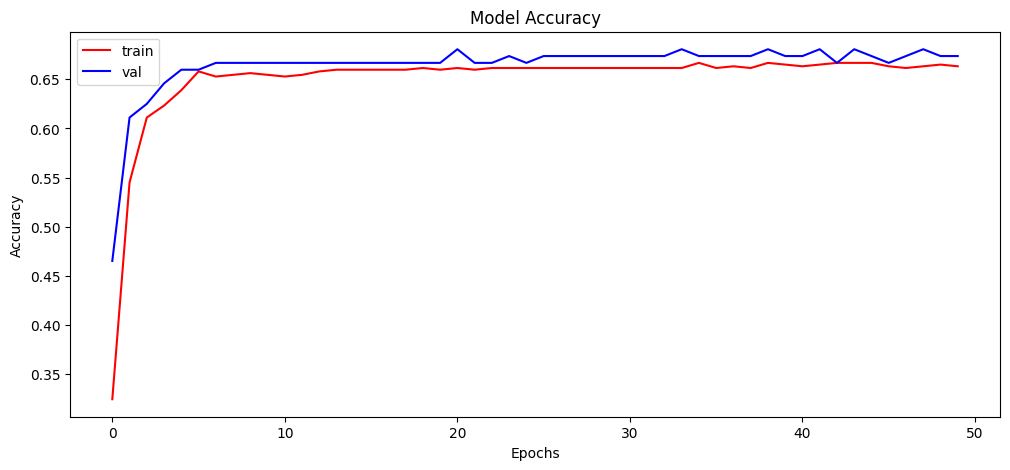

In [24]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

Evaluating the model to ascertain its accuracy

Avaliar o modelo para saber a precisão do modelo.

In [26]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 2s 301ms/step - loss: 0.3457 - accuracy: 0.6944
Test Accuracy: 69.44444179534912


Subsequently, we will utilize our model to predict labels for the test dataset.

Em seguida, usaremos nosso modelo para prever o rótulo do conjunto de dados de teste.

In [27]:
y_pred = model.predict(x_test)

6/6 [==============================] - 2s 334ms/step


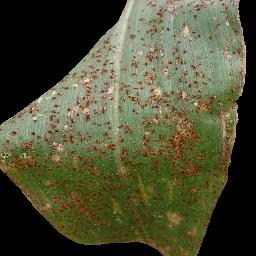

In [37]:
# Plotting image to compare
img = array_to_img(x_test[22])
img

Printing the original classification and the predicted classification

Imprimindo a classificaão original e a classificação prevista.

In [38]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[22])])
print("Predicted : ",all_labels[np.argmax(y_pred[22])])

Originally :  Corn-Common_rust
Predicted :  Corn-Common_rust
